# CONTEXT

The case is about bank who wants to increase borrowers (asset
customers) base to bring in more loan business and earn more through the interest on
loans. So , the bank wants to convert the liability based customers to personal loan
customers. (while retaining them as depositors). A campaign that the bank ran last year
for liability customers showed a healthy conversion rate of over 9% success. The
department wants you to build a model that will help them identify the potential
customers who have a higher probability of purchasing the loan. This will increase the
success ratio while at the same time reduce the cost of the campaign.

# Domain of the problem:BANK


 # Description of Data:

The data contains the information of 5000 customers.The data has the following attribute:

1.General information:age,income,id,etc.

2.Relation with Bank:Mortgage,Security account etc.

3.Details of personal loan.

Among 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

 steps we perform for our model:
 
 -> loading and cleaning of data
 
 -> EDA
 
 -> Data visualization through different graphs
 
 -> Data preprocessing
 
 -> prepare the model for training using different classification model
 
 -> prediction and uses of different metrics for evaluating the model performance
 
 -> Business understanding of the model

# Objective:

The Cassification goal is to predict the likelihood of a liability customer buying personal
loans using different training model.Then we have to chhose the appropriate model which have highest accuracy.

# python library

In [1]:
 #loading of different python libraries
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.decomposition import PCA
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Loading of dataset and check datatype, statistical summary, shape, null values etc.

In [2]:
#loading of data
df=pd.read_csv('C:/Users/KIIT/Desktop/bank_personal_loan_data.csv')
df.head(10)


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


Features Understanding from the above dataframe :-

Nonimal Varibles :

ID 

ZIP Code 

These two can be drop because we cannot predict which customer will take loan or not on the basis of zip code and id as these two are not providing any informative data for prediction.

Ordinal Categorical variables :

Family 
a
Education 

Interval Variables :

Age 

Experience  

Income 

CCAvg 

Mortgage 

Personal Loan - This our target variable which we have to predict. This will show  customer has token loan or not?

In [3]:
# shows different datatype present.
df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [4]:
# columns name
df.columns


Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [5]:
#checking shape ,how many rows and coumns are there.
df.shape

(5000, 14)

   This shows the no of columns:5000,rows:14

In [6]:
#data information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 546.9 KB


In [7]:
#checking null values
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

  we can see there is no missing value in the dataframe.

# statistical summary 

In [8]:
#for median 
df.median()

ID                     2500.5
Age                      45.0
Experience               20.0
Income                   64.0
ZIP Code              93437.0
Family                    2.0
CCAvg                     1.5
Education                 2.0
Mortgage                  0.0
Personal Loan             0.0
Securities Account        0.0
CD Account                0.0
Online                    1.0
CreditCard                0.0
dtype: float64

In [9]:
#  for mode
df.mode()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,35.0,32.0,44.0,94720.0,1.0,0.3,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4996,4997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4997,4998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4998,4999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


# Cleaning of data

As we can see there are negative values in experience attribute so we have to clean the negative data


In [11]:
# As we have already seen that there is no missing value so we clean the negative values.

df[df['Experience'] < 0]['Experience'].count()

52

 There are 52 data which are negative in experience feature
 

In [12]:
# Removing the negative value
df_Pe = df.loc[df['Experience'] >0]
Ne = df.Experience < 0
column_name = 'Experience'
df_Ne_list = df.loc[Ne]['ID'].tolist()
for id in df_Ne_list:
    age = df.loc[np.where(df['ID']==id)]["Age"].tolist()[0]
    education = df.loc[np.where(df['ID']==id)]["Education"].tolist()[0]
    df_filtered = df_Pe[(df_Pe.Age == age) & (df_Pe.Education == education)]
    exp = df_filtered['Experience'].median()
    df.loc[df.loc[np.where(df['ID']==id)].index, 'Experience'] = exp


In [13]:
df[df['Experience'] < 0]['Experience'].count()

0

we have removed all the negative values.

# Visualization of data


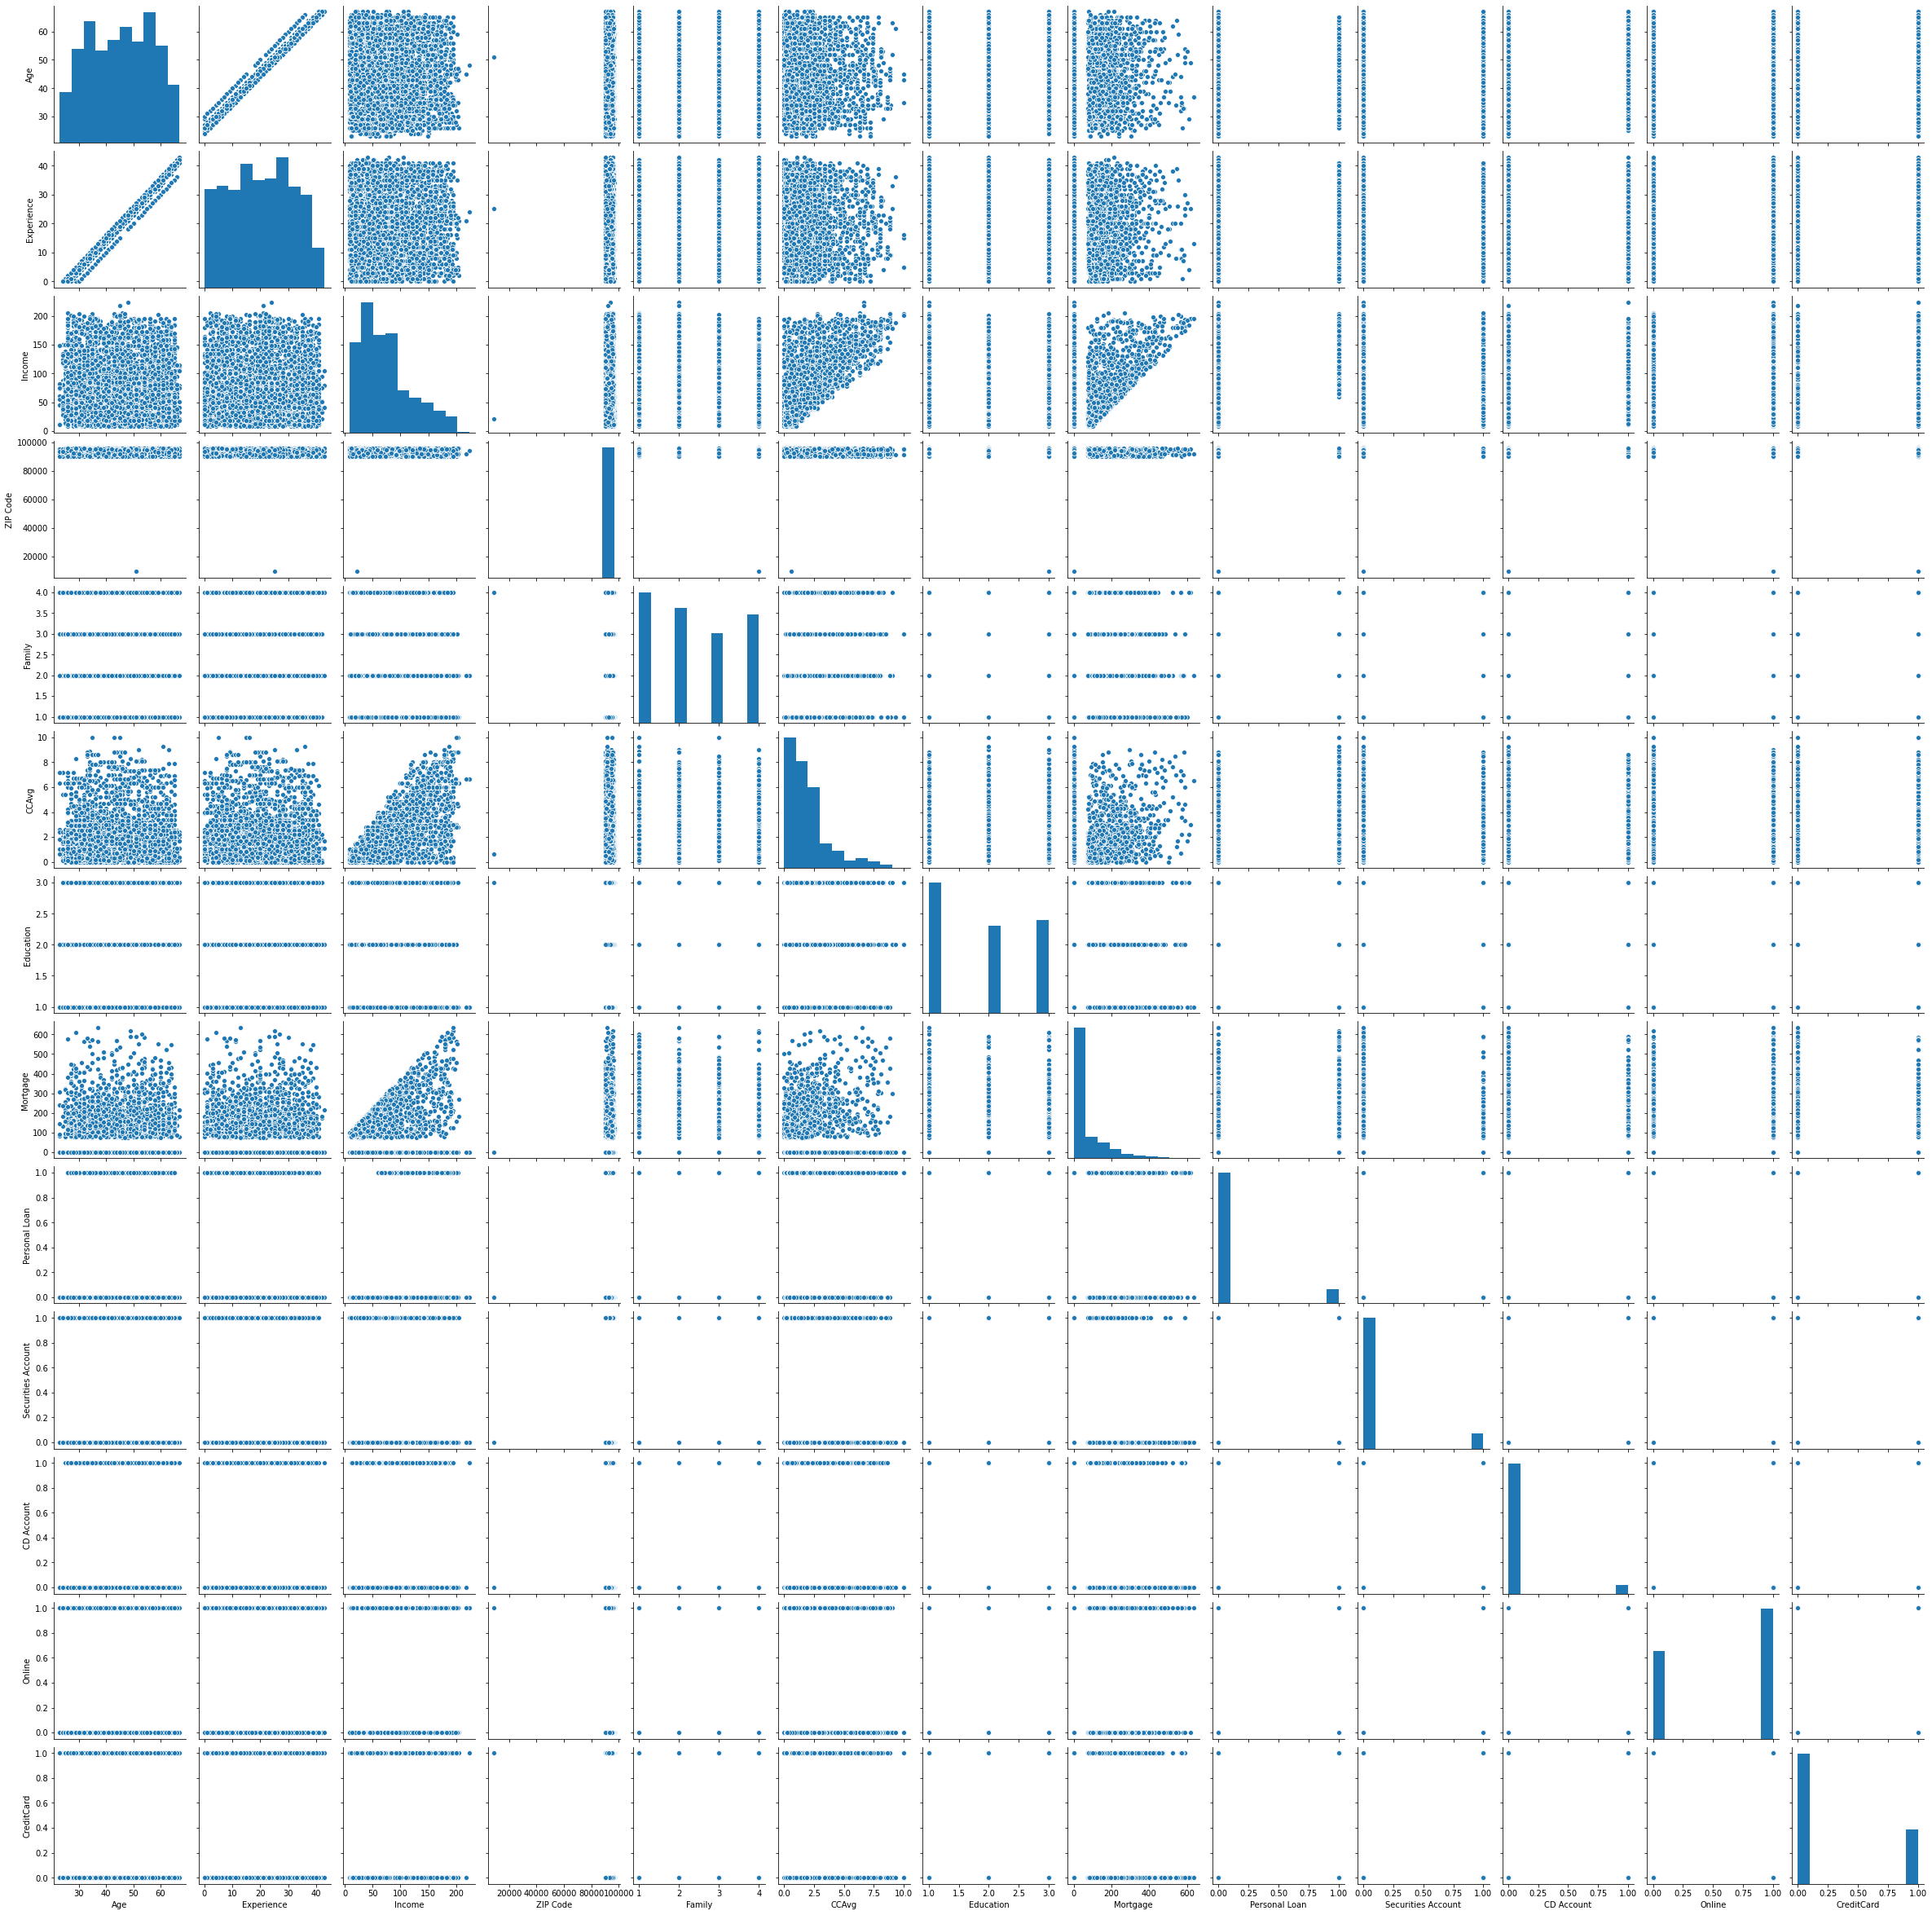

In [14]:
sns.pairplot(df.iloc[:,1:]) 

# Multivariate

<AxesSubplot:xlabel='CreditCard', ylabel='count'>

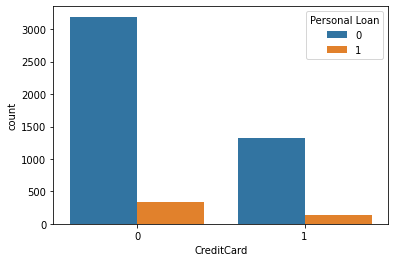

In [15]:
sns.countplot(x='CreditCard' ,data=df,hue="Personal Loan")

From above it is clear that customers with 0 credit cards have more loan as compare to customer having credit card.

<AxesSubplot:xlabel='CD Account', ylabel='count'>

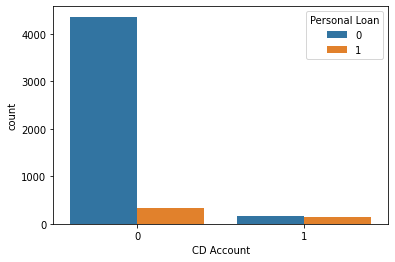

In [16]:
sns.countplot(x='CD Account' ,data=df,hue="Personal Loan")

here,there is no huge difference but customer having CD account have more loans.

<AxesSubplot:xlabel='Securities Account', ylabel='count'>

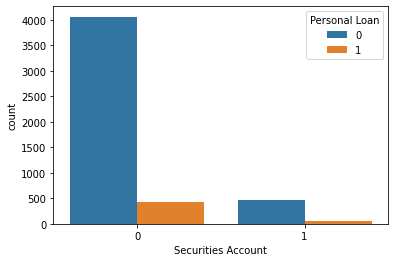

In [17]:
sns.countplot(x='Securities Account' ,data=df,hue="Personal Loan")

From above graph it is very clear customer having 0 Security account have more loans as compared to others.


<AxesSubplot:xlabel='Education', ylabel='count'>

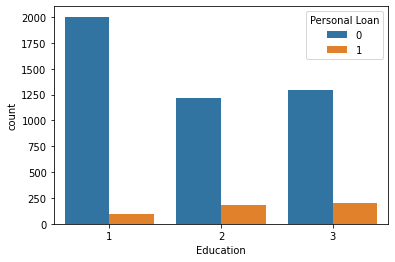

In [18]:
sns.countplot(x='Education' ,data=df,hue="Personal Loan")

customer having higher education have more personal loans as compared to customer who have persued less degree.

<AxesSubplot:xlabel='Family', ylabel='count'>

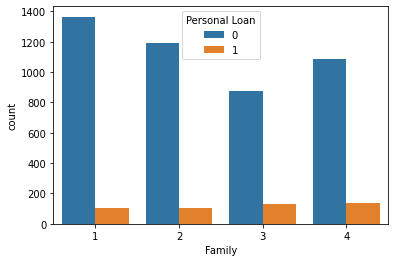

In [19]:
sns.countplot(x='Family' ,data=df,hue="Personal Loan")

Here,customer having 3 member have taken more loan as compared to others.

<AxesSubplot:xlabel='Education', ylabel='Mortgage'>

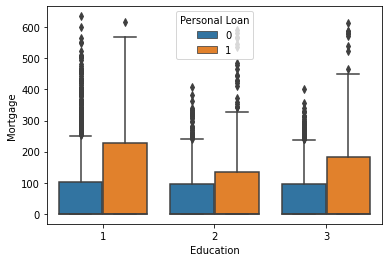

In [20]:
sns.boxplot(x='Education' ,y='Mortgage' ,data=df,hue="Personal Loan")

Above graph shows that customer with less education and Mortgage greater than 200 have taken more loan.

<AxesSubplot:xlabel='Education', ylabel='Family'>

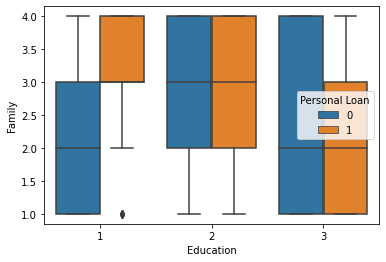

In [21]:
sns.boxplot(x='Education' ,y='Family' ,data=df,hue="Personal Loan")

From the above it is not much clear but the customer having higher education and family size 3 have higher loans.

<AxesSubplot:xlabel='Education', ylabel='Experience'>

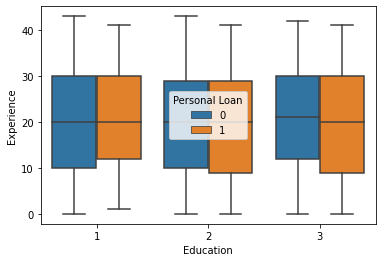

In [22]:
sns.boxplot(x='Education' ,y='Experience' ,data=df,hue="Personal Loan")

Here comparison is negligible so we cannot say much more with data.

<AxesSubplot:xlabel='Family', ylabel='Mortgage'>

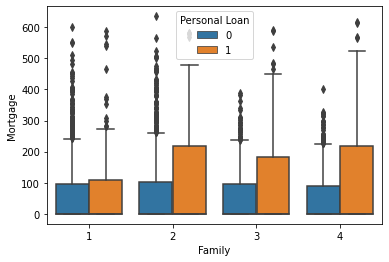

In [23]:
sns.boxplot(x='Family' ,y='Mortgage' ,data=df,hue="Personal Loan")

The graph shows Family having size 2 and 4 with mortgage approx 200 have taken more loans as compared to others.

<AxesSubplot:xlabel='CreditCard', ylabel='Mortgage'>

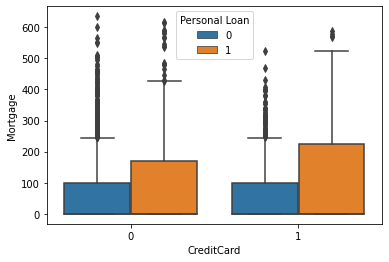

In [24]:
sns.boxplot(x='CreditCard' ,y='Mortgage' ,data=df,hue="Personal Loan")

customer having credit card have more loans.

<AxesSubplot:xlabel='Family', ylabel='CCAvg'>

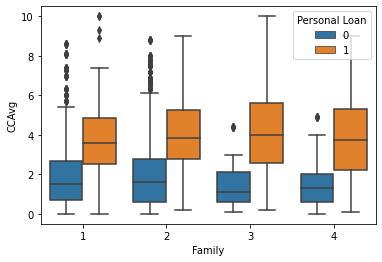

In [25]:
sns.boxplot(x='Family' ,y='CCAvg' ,data=df,hue="Personal Loan")

customer wit family size 3,4 and havig CCAvg between 2.5-6 have taken more loans.

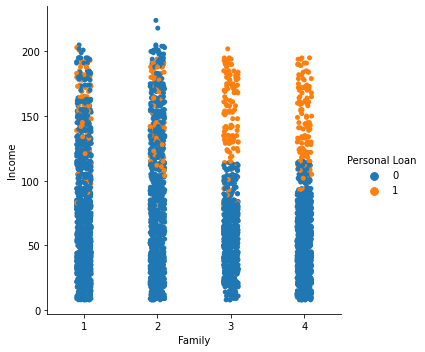

In [26]:
# here we use catplot because box plot not give a proper view of understanding.
sns.catplot(x='Family' ,y='Income' ,data=df,hue="Personal Loan")

Family size 3 and 4 with income 120 to 200 have taken more loans.

<AxesSubplot:>

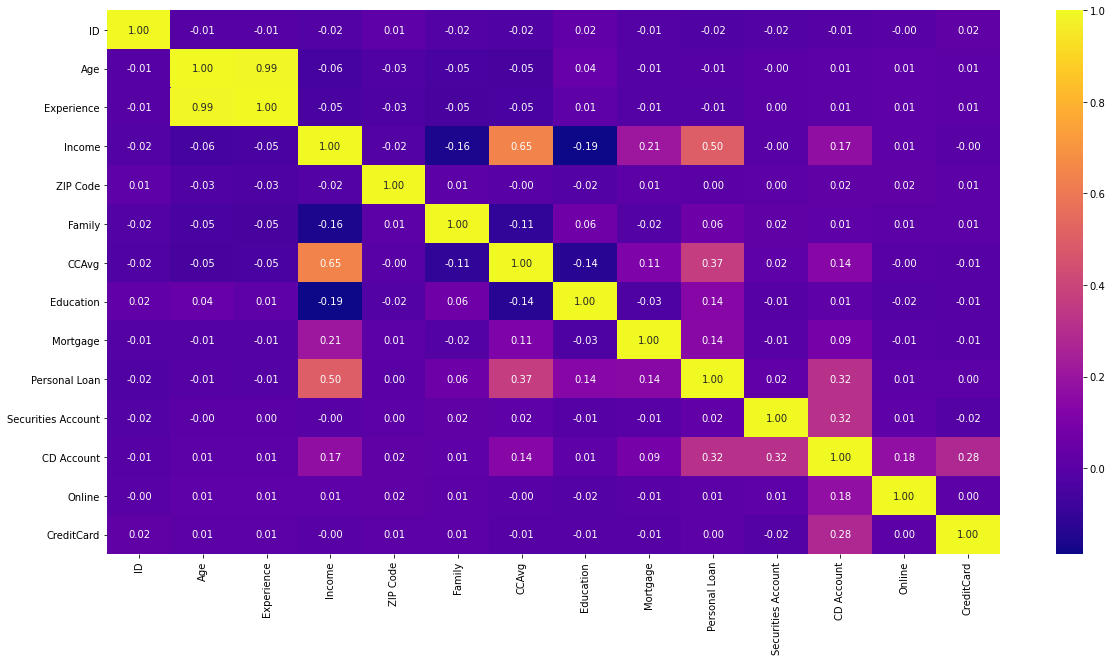

In [27]:
#heat map to find correlation
plt.figure(figsize = (20,10))

sns.heatmap(df.corr(), cmap='plasma',annot=True, fmt='.2f')

We can see from heat map that age and experience is highly correlated to each other.

# Univariate analysis is conducted through several ways which are mostly descriptive in nature:

Frequency Distribution Tables,
Histograms,
Frequency Polygons,
Pie Charts,
Bar Charts
# Skewness of the data


<AxesSubplot:xlabel='ID'>

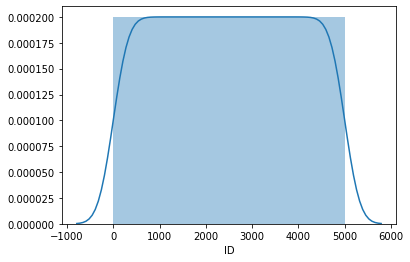

In [28]:
sns.distplot(df['ID'])

The above graph shows uniform distribution.

<AxesSubplot:xlabel='Age'>

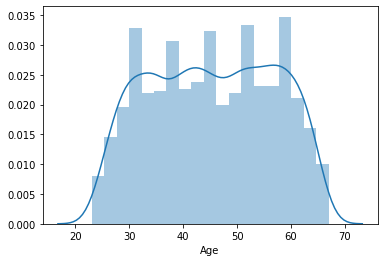

In [29]:
sns.distplot(df['Age'])

It is normally distributed.

<AxesSubplot:xlabel='Income'>

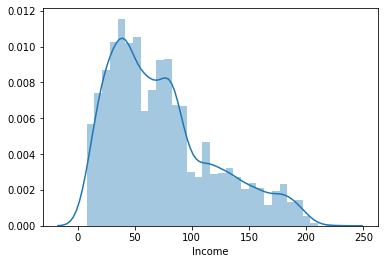

In [30]:
sns.distplot(df['Income'])

 Postively right skewed graph.

<AxesSubplot:xlabel='CCAvg'>

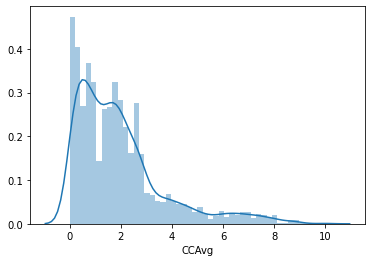

In [31]:
sns.distplot(df['CCAvg'])

postive skewed


<AxesSubplot:xlabel='Experience'>

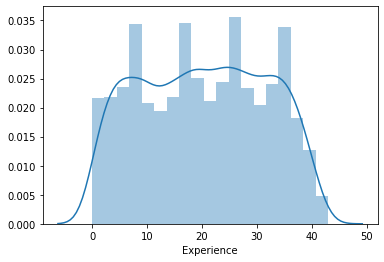

In [32]:
sns.distplot(df['Experience'])

It is also normally distributed 

<AxesSubplot:xlabel='Family'>

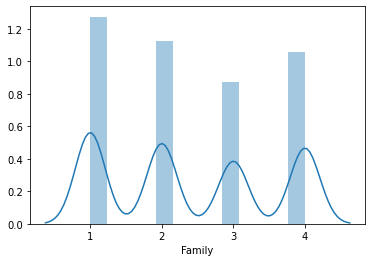

In [33]:
sns.distplot(df['Family'])

It shows more no of family size 1 and 2

<AxesSubplot:xlabel='Education'>

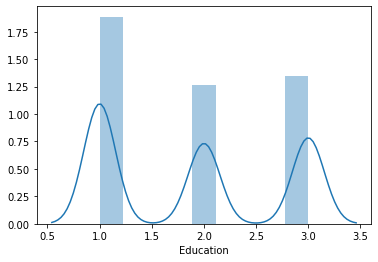

In [34]:
sns.distplot(df['Education'])

Less graduated customer are more than graduate in bank

<AxesSubplot:xlabel='Mortgage'>

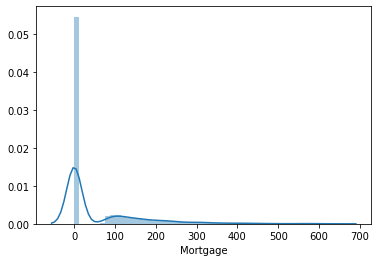

In [35]:
sns.distplot(df['Mortgage'])

Most of the customer have less mortgage .
highly skewed

<AxesSubplot:xlabel='Securities Account'>

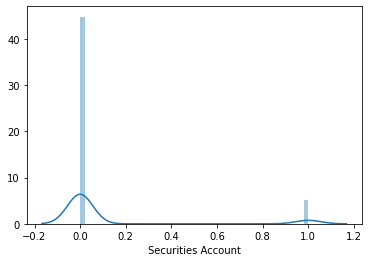

In [36]:
sns.distplot(df['Securities Account'])

Very less customer have security accounts

<AxesSubplot:xlabel='CreditCard'>

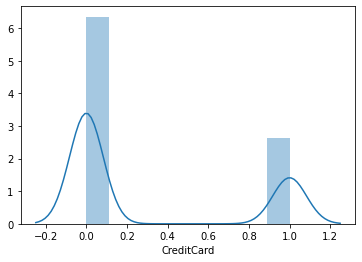

In [37]:
sns.distplot(df['CreditCard'])

No of customer having credit card is more(almost double )than customer having no credit card

<AxesSubplot:xlabel='Online'>

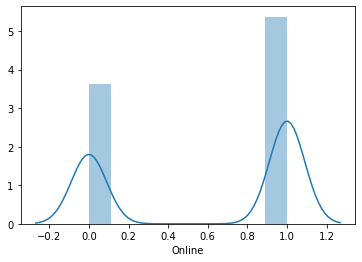

In [38]:
sns.distplot(df['Online'])

There are more no of online customer than offline customer in bank

# Transformation of feature variables.

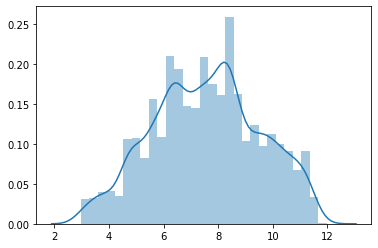

In [39]:
#Reducing skewness using power transformation
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson',standardize=False)
pt.fit(df['Income'].values.reshape(-1,1))
sns.distplot(pt.transform(df['Income'].values.reshape(-1,1)));

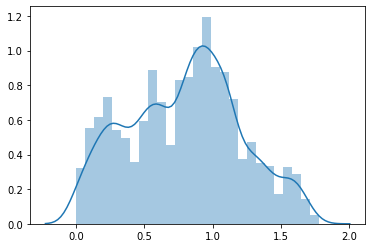

In [40]:
pt=PowerTransformer(method='yeo-johnson',standardize=False)
pt.fit(df['CCAvg'].values.reshape(-1,1))
sns.distplot(pt.transform(df['CCAvg'].values.reshape(-1,1)));

using bins for mortgage column because it is highly skewed and the data is discrete so instead of using power transformer we use binning technique.

In [41]:
# binning technique.
df['Mortgage_Int']=pd.cut(df['Mortgage'],
                          bins=[0,100,200,300,400,500,600,700],
                          labels=[0,1,2,3,4,5,6],
                          include_lowest=True)
df.drop('Mortgage',axis=1,inplace=True)

In [42]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Personal Loan,Securities Account,CD Account,Online,CreditCard,Mortgage_Int
0,1,25,1.0,49,91107,4,1.6,1,0,1,0,0,0,0
1,2,45,19.0,34,90089,3,1.5,1,0,1,0,0,0,0
2,3,39,15.0,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9.0,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8.0,45,91330,4,1.0,2,0,0,0,0,1,0


c:\users\kiit\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


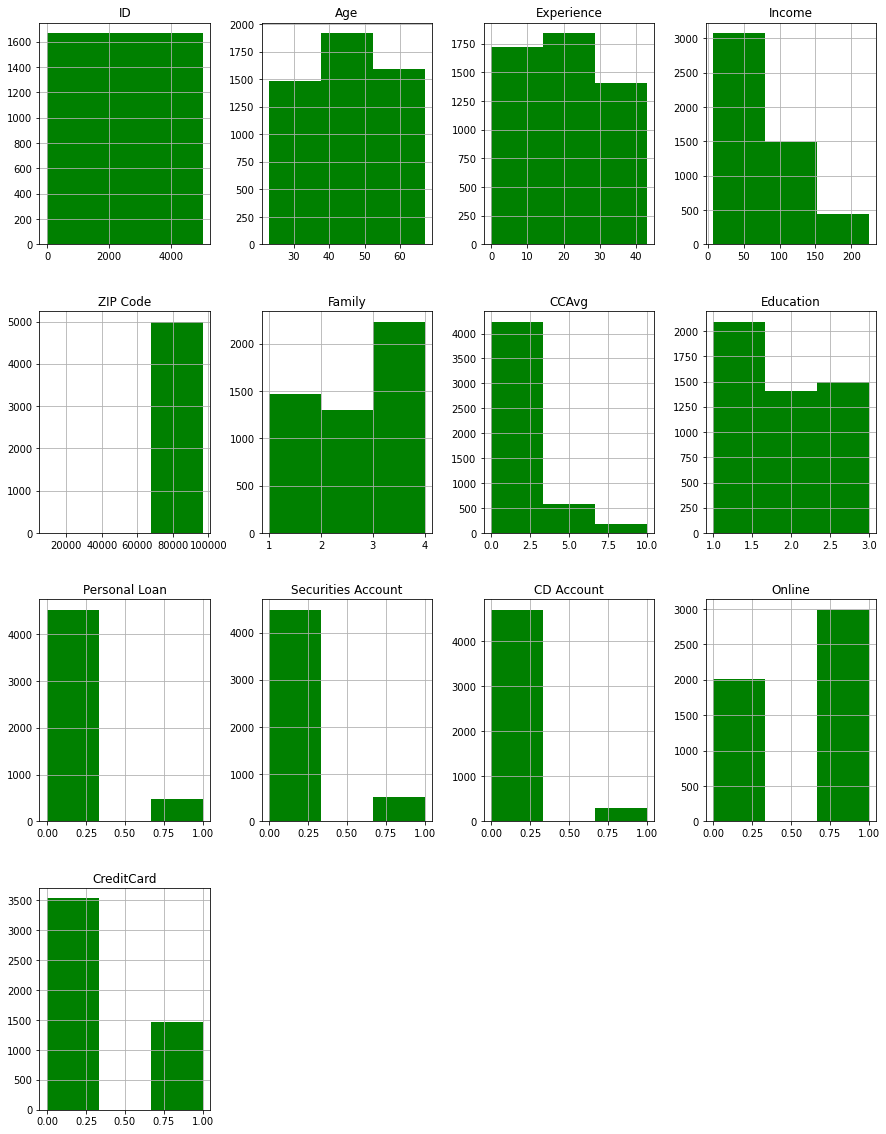

In [43]:
#Univaraite (histogram)

fig = plt.figure(figsize = (15,20))
hist=df.hist(bins=3,color='green',ax = fig.gca())

In [44]:
loan_counts = pd.DataFrame(df["Personal Loan"].value_counts()).reset_index()
loan_counts.columns =["Labels","Personal Loan"]
loan_counts

,Labels,Personal Loan
0,0,4520
1,1,480


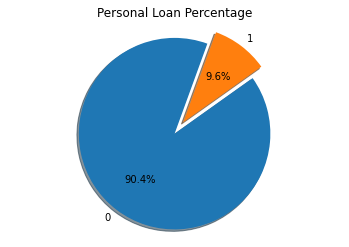

In [45]:
# univariate(Pie plot)
fig1, ax1 = plt.subplots()
explode = (0, 0.15)
ax1.pie(loan_counts["Personal Loan"], explode=explode, labels=loan_counts["Labels"], autopct='%1.1f%%',
        shadow=True, startangle=70)
ax1.axis('equal')  
plt.title("Personal Loan Percentage")
plt.show()

<AxesSubplot:>

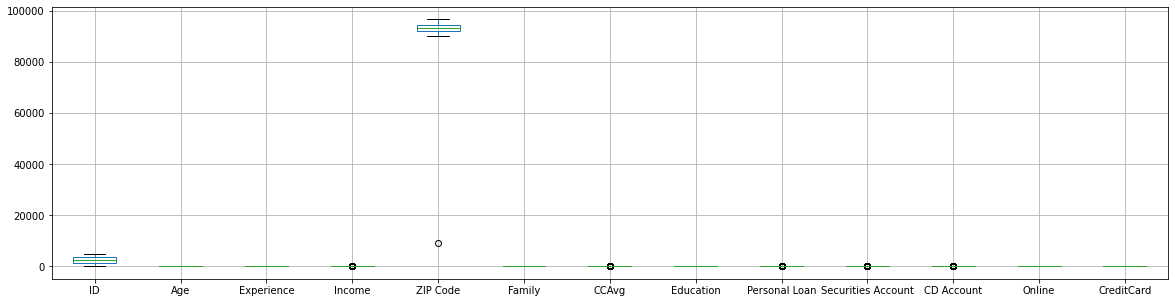

In [46]:
# check outliers
df.boxplot(return_type='axes', figsize=(20,5))

# Bivariate Analysis
Bivariate analysis is conducted through:

Correlation coefficients


In [47]:
#Bivariate Analysis done by finding correlation coefficient.
correlation_df = df.corr()

print(correlation_df)

                          ID       Age  Experience    Income  ZIP Code  \
ID                  1.000000 -0.008473   -0.009308 -0.017695  0.013432   
Age                -0.008473  1.000000    0.994159 -0.055269 -0.029216   
Experience         -0.009308  0.994159    1.000000 -0.048095 -0.030649   
Income             -0.017695 -0.055269   -0.048095  1.000000 -0.016410   
ZIP Code            0.013432 -0.029216   -0.030649 -0.016410  1.000000   
Family             -0.016797 -0.046418   -0.049420 -0.157501  0.011778   
CCAvg              -0.024675 -0.052012   -0.047694  0.645984 -0.004061   
Education           0.021463  0.041334    0.013075 -0.187524 -0.017377   
Personal Loan      -0.024801 -0.007726   -0.011498  0.502462  0.000107   
Securities Account -0.016972 -0.000436    0.001059 -0.002616  0.004704   
CD Account         -0.006909  0.008043    0.007381  0.169738  0.019972   
Online             -0.002528  0.013702    0.014501  0.014206  0.016990   
CreditCard          0.017028  0.007681

# Unique and value counts for different attribute

In [48]:
df.nunique()


ID                    5000
Age                     45
Experience              44
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
Mortgage_Int             7
dtype: int64

In [49]:
df.Mortgage_Int.value_counts(0)

0    3744
1     758
2     297
3     128
4      48
5      21
6       4
Name: Mortgage_Int, dtype: int64

In [50]:
((df['Mortgage_Int'])==0).sum()

3744

Total no of people having zero mortgage value are 3462.


In [51]:
((df['CCAvg'])==0).sum()

106

Total no of customer with zero credit card spending per month are 106


 we can say coulmns like Family, Education,CD Account,Online,CreditCard,Personal Loan as categorical columns

In [52]:
# value counts for categorical column
n=['Family','CD Account','Education','Online','CreditCard','Personal Loan']
for column in n:
   print(column)
   print(df[column].value_counts())
   print('*'*5)

Family
1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64
*****
CD Account
0    4698
1     302
Name: CD Account, dtype: int64
*****
Education
1    2096
3    1501
2    1403
Name: Education, dtype: int64
*****
Online
1    2984
0    2016
Name: Online, dtype: int64
*****
CreditCard
0    3530
1    1470
Name: CreditCard, dtype: int64
*****
Personal Loan
0    4520
1     480
Name: Personal Loan, dtype: int64
*****


In [53]:
df['ZIP Code'].value_counts()

94720    169
94305    127
95616    116
90095     71
93106     57
        ... 
96145      1
94970      1
94598      1
90068      1
94087      1
Name: ZIP Code, Length: 467, dtype: int64

Dropping of some feature attribute which have not more impact on prediction of custome taking personal loans.


In [54]:
#  dropping of columns

df=df.drop(columns=['ID','ZIP Code','Experience'])


we have drop age and zip code because these columns will not affect prediction of laon.Also we will drop the age column because it is highly correlated with the experience column.

# preprocessing of data

In [55]:
# Min-Max Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df)
print(df)

      Age  Income  Family  CCAvg  Education  Personal Loan  \
0      25      49       4    1.6          1              0   
1      45      34       3    1.5          1              0   
2      39      11       1    1.0          1              0   
3      35     100       1    2.7          2              0   
4      35      45       4    1.0          2              0   
...   ...     ...     ...    ...        ...            ...   
4995   29      40       1    1.9          3              0   
4996   30      15       4    0.4          1              0   
4997   63      24       2    0.3          3              0   
4998   65      49       3    0.5          2              0   
4999   28      83       3    0.8          1              0   

      Securities Account  CD Account  Online  CreditCard Mortgage_Int  
0                      1           0       0           0            0  
1                      1           0       0           0            0  
2                      0           0   

In [56]:
df.head()

,Age,Income,Family,CCAvg,Education,Personal Loan,Securities Account,CD Account,Online,CreditCard,Mortgage_Int
0,25,49,4,1.6,1,0,1,0,0,0,0
1,45,34,3,1.5,1,0,1,0,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,1,0


 # splitting the data into Training and Testing.

In [57]:
# defining Feature variable(x) and Target variable(y)
x = df.drop('Personal Loan', axis=1)
y = df[['Personal Loan']]


In [58]:
# splliting the data into training  and testing data

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [59]:
#Feature Scaling
sc_x= StandardScaler()
x_train=sc_x.fit_transform(x_train)
x_test=sc_x.transform(x_test)
x_train,x_test

(array([[-0.80820951,  1.8151347 , -0.36017598, ...,  0.82674161,
          1.55390931,  0.71090483],
        [ 1.19600667,  0.6042706 ,  1.36551318, ...,  0.82674161,
         -0.6435382 ,  0.71090483],
        [ 1.10886684, -0.67146121, -0.36017598, ...,  0.82674161,
         -0.6435382 , -0.47506605],
        ...,
        [-1.67960785, -1.08229009, -0.36017598, ..., -1.20956777,
          1.55390931,  0.71090483],
        [ 1.021727  , -0.54172577,  1.36551318, ...,  0.82674161,
          1.55390931,  1.89687571],
        [-1.06962902, -0.77957407, -1.22302056, ..., -1.20956777,
         -0.6435382 ,  0.71090483]]),
 array([[ 0.7603075 , -1.10391267, -0.36017598, ..., -1.20956777,
         -0.6435382 , -0.47506605],
        [-1.06962902,  0.19344172, -1.22302056, ...,  0.82674161,
         -0.6435382 , -0.47506605],
        [ 0.7603075 , -0.04440659,  0.5026686 , ..., -1.20956777,
          1.55390931,  1.89687571],
        ...,
        [-1.06962902,  1.03672207, -1.22302056, ...,  

# First we train and test different model and check the accuracy of train and test set.

# 1.LogisticRegression

In [60]:
#Model calling
classifier1=LogisticRegression()
classifier1.fit(x_train,y_train.values.ravel())


LogisticRegression()

In [61]:
#prediction of train and test data
y_trainpred1=classifier1.predict(x_train)
y_trainpred1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [62]:
y_testpred1=classifier1.predict(x_test)
y_testpred1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [63]:
#Accuracy
result1=accuracy_score(y_train,y_trainpred1)
print('Train_accuracy_score',result1)
result2=accuracy_score(y_test,y_testpred1)
print('Test_accuracy_score',result2)

Train_accuracy_score 0.9511428571428572
Test_accuracy_score 0.954


In [64]:
def draw_cm(actual,predicted):
    cm=confusion_matrix(actual,predicted)
    sns.heatmap(cm,annot=True,fmt='.2f',xticklabels=[0,1],yticklabels=[0,1])
    plt.ylabel('observed')
    plt.xlabel('predicted')
    plt.show()

In [65]:
y_test.shape

(1500, 1)

confusion matrix


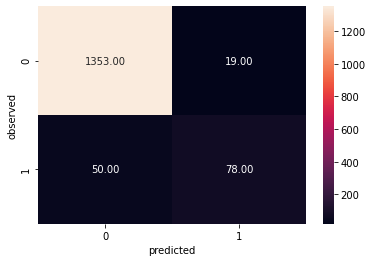

None


In [66]:
print('confusion matrix')
print(draw_cm(y_test,y_testpred1.reshape(-1,1)))

In [67]:
#confusion matrix
result4=confusion_matrix(y_test,y_testpred1)
print('Test_confusion_matrix:',result4)

Test_confusion_matrix: [[1353   19]
 [  50   78]]


In [68]:
#Classification report
result6=classification_report(y_test,y_testpred1)
print('classification_report:',result6)

classification_report:               precision    recall  f1-score   support

           0       0.96      0.99      0.98      1372
           1       0.80      0.61      0.69       128

    accuracy                           0.95      1500
   macro avg       0.88      0.80      0.83      1500
weighted avg       0.95      0.95      0.95      1500



In [69]:
precision = precision_score(y_test, y_testpred1)
print('Precision: %f' % precision)
recall = recall_score(y_test, y_testpred1)
print('Recall: %f' % recall)
f1 = f1_score(y_test,y_testpred1)
print('F1 score: %f' % f1)
auc = roc_auc_score(y_test, y_testpred1)
print('ROC AUC: %f' % auc)

Precision: 0.804124
Recall: 0.609375
F1 score: 0.693333
ROC AUC: 0.797763


# 2. DecisionTreeClassifier

In [70]:
#Model calling
classifier2=DecisionTreeClassifier()
classifier2.fit(x_train,y_train.values.ravel())


DecisionTreeClassifier()

In [71]:
#prediction of train and test data
y_trainpred2=classifier2.predict(x_train)
y_trainpred2

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [72]:
y_testpred2=classifier2.predict(x_test)
y_testpred2

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [73]:
#Accuracy
result1=accuracy_score(y_train,y_trainpred2)
print('Train_accuracy_score',result1)
result2=accuracy_score(y_test,y_testpred2)
print('Test_accuracy_score',result2)

Train_accuracy_score 1.0
Test_accuracy_score 0.9746666666666667


In [74]:
def draw_cm(actual,predicted):
    cm=confusion_matrix(actual,predicted)
    sns.heatmap(cm,annot=True,fmt='.2f',xticklabels=[0,1],yticklabels=[0,1])
    plt.ylabel('observed')
    plt.xlabel('predicted')
    plt.show()

In [75]:
y_test.shape

(1500, 1)

confusion matrix


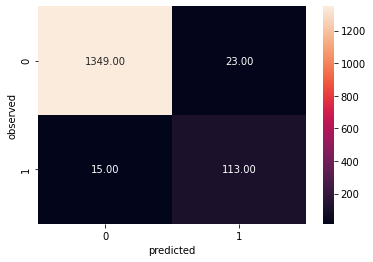

None


In [76]:
print('confusion matrix')
print(draw_cm(y_test,y_testpred2.reshape(-1,1)))

In [77]:
#confusion matrix
result4=confusion_matrix(y_test,y_testpred2)
print('Test_confusion_matrix:',result4)

Test_confusion_matrix: [[1349   23]
 [  15  113]]


In [78]:
#Classification report
result6=classification_report(y_test,y_testpred2)
print('classification_report:',result6)

classification_report:               precision    recall  f1-score   support

           0       0.99      0.98      0.99      1372
           1       0.83      0.88      0.86       128

    accuracy                           0.97      1500
   macro avg       0.91      0.93      0.92      1500
weighted avg       0.98      0.97      0.98      1500



In [79]:
precision = precision_score(y_test, y_testpred2)
print('Precision: %f' % precision)
recall = recall_score(y_test, y_testpred2)
print('Recall: %f' % recall)
f1 = f1_score(y_test,y_testpred2)
print('F1 score: %f' % f1)
auc = roc_auc_score(y_test, y_testpred2)
print('ROC AUC: %f' % auc)

Precision: 0.830882
Recall: 0.882812
F1 score: 0.856061
ROC AUC: 0.933024


# 3. RandomForestClassifier

In [80]:
#Model calling
classifier3=RandomForestClassifier()
classifier3.fit(x_train,y_train.values.ravel())


RandomForestClassifier()

In [81]:
#prediction of train and test data
y_trainpred3=classifier3.predict(x_train)
y_trainpred3

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [82]:
y_testpred3=classifier3.predict(x_test)
y_testpred3

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [83]:
#Accuracy
result1=accuracy_score(y_train,y_trainpred3)
print('Train_accuracy_score',result1)
result2=accuracy_score(y_test,y_testpred3)
print('Test_accuracy_score',result2)

Train_accuracy_score 1.0
Test_accuracy_score 0.986


In [84]:
def draw_cm(actual,predicted):
    cm=confusion_matrix(actual,predicted)
    sns.heatmap(cm,annot=True,fmt='.2f',xticklabels=[0,1],yticklabels=[0,1])
    plt.ylabel('observed')
    plt.xlabel('predicted')
    plt.show()

In [85]:
y_test.shape

(1500, 1)

confusion matrix


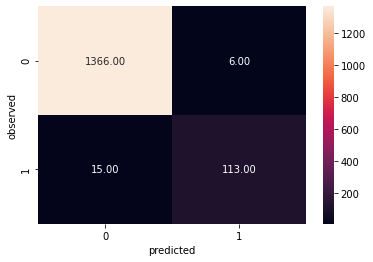

None


In [86]:
print('confusion matrix')
print(draw_cm(y_test,y_testpred3.reshape(-1,1)))

In [87]:
#confusion matrix
result4=confusion_matrix(y_test,y_testpred3)
print('Test_confusion_matrix:',result4)

Test_confusion_matrix: [[1366    6]
 [  15  113]]


In [88]:
#Classification report
result6=classification_report(y_test,y_testpred3)
print('classification_report:',result6)

classification_report:               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1372
           1       0.95      0.88      0.91       128

    accuracy                           0.99      1500
   macro avg       0.97      0.94      0.95      1500
weighted avg       0.99      0.99      0.99      1500



In [89]:
precision = precision_score(y_test, y_testpred3)
print('Precision: %f' % precision)
recall = recall_score(y_test, y_testpred3)
print('Recall: %f' % recall)
f1 = f1_score(y_test,y_testpred3)
print('F1 score: %f' % f1)
auc = roc_auc_score(y_test, y_testpred3)
print('ROC AUC: %f' % auc)

Precision: 0.949580
Recall: 0.882812
F1 score: 0.914980
ROC AUC: 0.939220


# 4. KNeighborsClassifier

In [90]:
#Model calling
classifier4=KNeighborsClassifier()
classifier4.fit(x_train,y_train.values.ravel())


KNeighborsClassifier()

In [91]:
#prediction of train and test data
y_trainpred4=classifier4.predict(x_train)
y_trainpred4

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [92]:
y_testpred4=classifier4.predict(x_test)
y_testpred4

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [93]:
#Accuracy
result1=accuracy_score(y_train,y_trainpred4)
print('Train_accuracy_score',result1)
result2=accuracy_score(y_test,y_testpred4)
print('Test_accuracy_score',result2)

Train_accuracy_score 0.9708571428571429
Test_accuracy_score 0.9646666666666667


In [94]:
def draw_cm(actual,predicted):
    cm=confusion_matrix(actual,predicted)
    sns.heatmap(cm,annot=True,fmt='.2f',xticklabels=[0,1],yticklabels=[0,1])
    plt.ylabel('observed')
    plt.xlabel('predicted')
    plt.show()

In [95]:
y_test.shape

(1500, 1)

confusion matrix


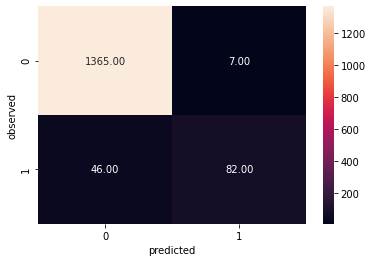

None


In [96]:
print('confusion matrix')
print(draw_cm(y_test,y_testpred4.reshape(-1,1)))

In [97]:
#confusion matrix
result4=confusion_matrix(y_test,y_testpred4)
print('Test_confusion_matrix:',result4)

Test_confusion_matrix: [[1365    7]
 [  46   82]]


In [98]:
#Classification report
result6=classification_report(y_test,y_testpred4)
print('classification_report:',result6)

classification_report:               precision    recall  f1-score   support

           0       0.97      0.99      0.98      1372
           1       0.92      0.64      0.76       128

    accuracy                           0.96      1500
   macro avg       0.94      0.82      0.87      1500
weighted avg       0.96      0.96      0.96      1500



In [99]:
precision = precision_score(y_test, y_testpred4)
print('Precision: %f' % precision)
recall = recall_score(y_test, y_testpred4)
print('Recall: %f' % recall)
f1 = f1_score(y_test,y_testpred4)
print('F1 score: %f' % f1)
auc = roc_auc_score(y_test, y_testpred4)
print('ROC AUC: %f' % auc)

Precision: 0.921348
Recall: 0.640625
F1 score: 0.755760
ROC AUC: 0.817761


# Neural Network

In [100]:
classifier5=MLPClassifier(hidden_layer_sizes=(8,8,8),activation='relu',solver='adam',max_iter=500)
classifier5.fit(x_train,y_train.values.ravel())

MLPClassifier(hidden_layer_sizes=(8, 8, 8), max_iter=500)

In [101]:
#prediction of train and test data
y_trainpred5=classifier5.predict(x_train)
y_trainpred5

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [102]:
y_testpred5=classifier5.predict(x_test)
y_testpred5

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [103]:
#Accuracy
result1=accuracy_score(y_train,y_trainpred5)
print('Train_accuracy_score',result1)
result2=accuracy_score(y_test,y_testpred5)
print('Test_accuracy_score',result2)

Train_accuracy_score 0.9882857142857143
Test_accuracy_score 0.9826666666666667


In [104]:
def draw_cm(actual,predicted):
    cm=confusion_matrix(actual,predicted)
    sns.heatmap(cm,annot=True,fmt='.2f',xticklabels=[0,1],yticklabels=[0,1])
    plt.ylabel('observed')
    plt.xlabel('predicted')
    plt.show()

In [105]:
y_test.shape

(1500, 1)

confusion matrix


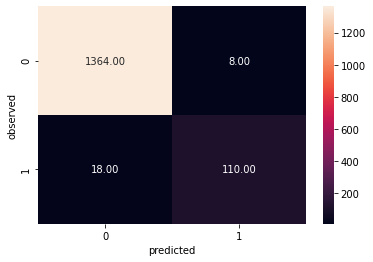

None


In [106]:
print('confusion matrix')
print(draw_cm(y_test,y_testpred5.reshape(-1,1)))

In [107]:
#confusion matrix
result4=confusion_matrix(y_test,y_testpred5)
print('Test_confusion_matrix:',result4)

Test_confusion_matrix: [[1364    8]
 [  18  110]]


In [108]:
#Classification report
result6=classification_report(y_test,y_testpred5)
print('classification_report:',result6)

classification_report:               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1372
           1       0.93      0.86      0.89       128

    accuracy                           0.98      1500
   macro avg       0.96      0.93      0.94      1500
weighted avg       0.98      0.98      0.98      1500



In [109]:
precision = precision_score(y_test, y_testpred5)
print('Precision: %f' % precision)
recall = recall_score(y_test, y_testpred5)
print('Recall: %f' % recall)
f1 = f1_score(y_test,y_testpred5)
print('F1 score: %f' % f1)
auc = roc_auc_score(y_test, y_testpred5)
print('ROC AUC: %f' % auc)

Precision: 0.932203
Recall: 0.859375
F1 score: 0.894309
ROC AUC: 0.926772


# Naive Bayes

In [110]:
#Model calling
classifier6=GaussianNB()
classifier6.fit(x_train,y_train.values.ravel())


GaussianNB()

In [111]:
#prediction of train and test data
y_trainpred6=classifier6.predict(x_train)
y_trainpred6

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [112]:
y_testpred6=classifier5.predict(x_test)
y_testpred6

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [113]:
#Accuracy
result1=accuracy_score(y_train,y_trainpred6)
print('Train_accuracy_score',result1)
result2=accuracy_score(y_test,y_testpred6)
print('Test_accuracy_score',result2)

Train_accuracy_score 0.8797142857142857
Test_accuracy_score 0.9826666666666667


In [114]:
def draw_cm(actual,predicted):
    cm=confusion_matrix(actual,predicted)
    sns.heatmap(cm,annot=True,fmt='.2f',xticklabels=[0,1],yticklabels=[0,1])
    plt.ylabel('observed')
    plt.xlabel('predicted')
    plt.show()

In [115]:
y_test.shape

(1500, 1)

confusion matrix


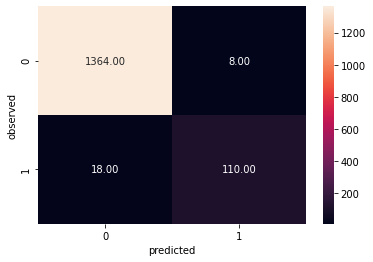

None


In [116]:
print('confusion matrix')
print(draw_cm(y_test,y_testpred6.reshape(-1,1)))

In [117]:
#confusion matrix
result4=confusion_matrix(y_test,y_testpred6)
print('Test_confusion_matrix:',result4)

Test_confusion_matrix: [[1364    8]
 [  18  110]]


In [118]:
#Classification report
result6=classification_report(y_test,y_testpred6)
print('classification_report:',result6)

classification_report:               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1372
           1       0.93      0.86      0.89       128

    accuracy                           0.98      1500
   macro avg       0.96      0.93      0.94      1500
weighted avg       0.98      0.98      0.98      1500



In [119]:
precision = precision_score(y_test, y_testpred6)
print('Precision: %f' % precision)
recall = recall_score(y_test, y_testpred6)
print('Recall: %f' % recall)
f1 = f1_score(y_test,y_testpred6)
print('F1 score: %f' % f1)
auc = roc_auc_score(y_test, y_testpred6)
print('ROC AUC: %f' % auc)

Precision: 0.932203
Recall: 0.859375
F1 score: 0.894309
ROC AUC: 0.926772


# svm

In [120]:
#Model calling
classifier7=SVC()
classifier7.fit(x_train,y_train.values.ravel())


SVC()

In [121]:
#prediction of train and test data
y_trainpred7=classifier7.predict(x_train)
y_trainpred7

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [122]:
y_testpred7=classifier7.predict(x_test)
y_testpred7

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [123]:
#Accuracy
result1=accuracy_score(y_train,y_trainpred7)
print('Train_accuracy_score',result1)
result2=accuracy_score(y_test,y_testpred7)
print('Test_accuracy_score',result2)

Train_accuracy_score 0.9794285714285714
Test_accuracy_score 0.9746666666666667


In [124]:
def draw_cm(actual,predicted):
    cm=confusion_matrix(actual,predicted)
    sns.heatmap(cm,annot=True,fmt='.2f',xticklabels=[0,1],yticklabels=[0,1])
    plt.ylabel('observed')
    plt.xlabel('predicted')
    plt.show()

In [125]:
y_test.shape

(1500, 1)

confusion matrix


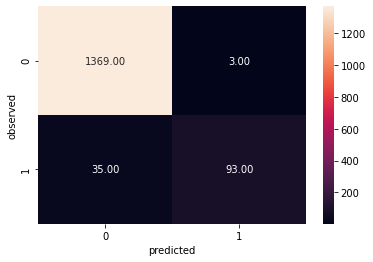

None


In [126]:
print('confusion matrix')
print(draw_cm(y_test,y_testpred7.reshape(-1,1)))

In [127]:
#confusion matrix
result4=confusion_matrix(y_test,y_testpred7)
print('Test_confusion_matrix:',result4)

Test_confusion_matrix: [[1369    3]
 [  35   93]]


In [128]:
#Classification report
result6=classification_report(y_test,y_testpred7)
print('classification_report:',result6)

classification_report:               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1372
           1       0.97      0.73      0.83       128

    accuracy                           0.97      1500
   macro avg       0.97      0.86      0.91      1500
weighted avg       0.97      0.97      0.97      1500



In [129]:
precision = precision_score(y_test, y_testpred7)
print('Precision: %f' % precision)
recall = recall_score(y_test, y_testpred7)
print('Recall: %f' % recall)
f1 = f1_score(y_test,y_testpred7)
print('F1 score: %f' % f1)
auc = roc_auc_score(y_test, y_testpred7)
print('ROC AUC: %f' % auc)

Precision: 0.968750
Recall: 0.726562
F1 score: 0.830357
ROC AUC: 0.862188


 By simply implement the above seven models.Logistic Regression have higher accuracy.

# Implementing model by k fold  cross validation

In [130]:
#Applying different models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Decision-Tree', DecisionTreeClassifier(criterion = 'entropy',max_depth=3)))
models.append(('Gaussian', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RandForest',RandomForestClassifier(max_depth = 2,n_estimators = 100)))
models.append(('ADA', AdaBoostClassifier(n_estimators = 100)))

In [131]:
# k fold cross validation for implementing different models.
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=None)
    cv_results = model_selection.cross_val_score(model, x_train, y_train.values.ravel(), cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "{}: {}".format(name, cv_results.mean())
    print(msg)

LR: 0.9494285714285715
LDA: 0.9397142857142857
KNN: 0.9557142857142857
Decision-Tree: 0.9782857142857143
Gaussian: 0.8805714285714286
SVM: 0.9725714285714286
RandForest: 0.9154285714285713
ADA: 0.9688571428571429


AFTER K-FOLD CROSS VALIDATION DECISION TREE OBTAINED THE HIGHEST ACCURACY WITH LESSER RUNTIME AND IS MORE STABLE. EVEN SVM OBTAINED THE SIMILAR RUNTIME BUT HAVE HIGHER RUNTIME COMPARED TO DECISION TREE.

# Graphical view of accuracy of models.

<AxesSubplot:>

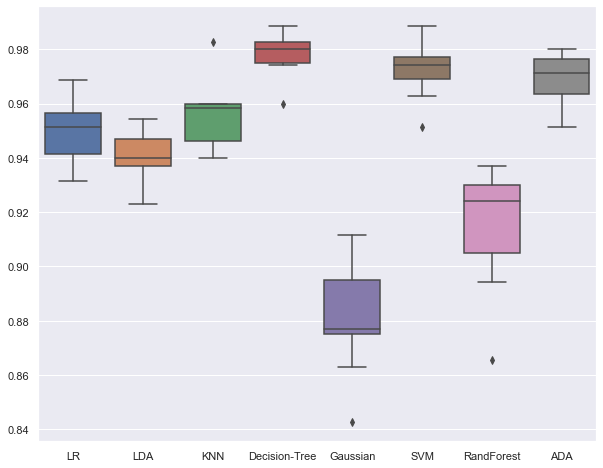

In [132]:
sns.set(rc={'figure.figsize':(10,8)})
sns.boxplot(names,results)

# CONCLUSION:

# steps

1.First Import different python library and then load the data in csv format.

  After loading we check datatype, statistical summary, shape, null values etc.This will show how our dataset is given.Is there   Null values,Misssing values, Negative values.no of columns and rows etc are present or not.
  
 ->we categries all the columns as feature columns except personal loan as target variable.

2.Data cleaning is the next step to follow to check if there are any negative values,skewness outliers are present or not
  observation from description table shows that experience column have some negative values.so, first we remove the negative       value rows so that our prediction can be more accurate.

3.EDA Analysis:
    
   1.visualization of data using univariate,baivariate,multivariate is the next thing we have done.

 -> univariate analysis shows the skeweness of the all features columns.
    CCAvg,Mortgage,Income shows positive skewness.
    
 -> Bivariate shows the if there is a correlation beteen the columns.Here,Age and Experience are highly correlated to each           other.
   
 -> Multivariate analysis show how the features columns are related to the target variable.we use Box plot for the comparison       and conclude that which columns affect the customer taking personal loans.
  
   2.After this we drop columns ID and ZIP Code because these two columns not affect the personal loan ad id is just a count          value and ZIP Code is very dicreate.Along with this drop Experience column as it is correlated to age.
   
   Also check the values like:
  
   ● Number of unique in each column.
   
   ● Number of people with zero mortgage.
   
   ● Number of people with zero credit card spending per month.
   
   ● Value counts of all categorical columns.
  
4.Then we apply some transformation to feature variable.

   we do power transformation to reduce the skewness for CCAvg and Income.
   And Binning technique for Mortgage because this column contains discreate values.
   
5.Preprocessing of data is now done by using min max scaler.
  
  Min-max scaling is a common feature pre-processing technique which results in scaled data values that fall in the range(0,1).
   
6.After preprocessing we split the data into training and testing set using 70:30 ratio for our data.
  
  Now,Different Models are used to train the dataset.Different models which are used in this project are:
  
 ->LOGESTIC REGRESSION
 
 ->LDA
 
 ->KNN
 
 ->DECISION TREE CLASSIFIER
 
 ->RANDOM FOREST CLASSIFIER
 
 ->SVM
 
 ->NAIVE BAYES
 ->NEURAL NETWORK
 
First we apply the classifier to train our dataset.And find the different metrics like accuracy,confusion,classification,precison,Recall,F1 score,ROC AC.

->Accuracy check the accuracy of our train and test model and it shows how much our model can give goood results.

->confusion metrix shows how many actual customer are taking loans and our model shows that they have not taken.This data is       negative postive and the other thing we check that how many no of customers have not taken loan but the model shows that they   have taken laons.This data is postive negative in confusion metrix graph.

->By default the numerical values in data frame are stored up to 6 decimals only. ... Apart from applying formats to each data     frame is there any global setting that helps preserving the precision.

->A Classification report is used to measure the quality of predictions from a classification algorithm.The report shows the       main classification metrics precision, recall and f1-score on a per-class basis. The metrics are calculated by using true and   false positives, true and false negatives.

->Recall is defined as the number of true positives over the number of true positives plus the number of false negatives.

->AUC is a very useful measure of similarity between two classes measuring area under "Receiver Operating Characteristic" or ROC   curve. In case of data with no ties all sections of ROC curve are either horizontal or vertical.

7.After applying all the data the accuarcy,confusion,and classifiaction report are:

->LR:Test_accuracy_score 0.954
  
  
   Test_confusion matrix:
          [[1353   19]
          [  50   78]]
 
 
   
   classification_report:              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1372
           1       0.80      0.61      0.69       128

    accuracy                           0.95      1500
    
   macro avg       0.88      0.80      0.83      1500
   
weighted avg       0.95      0.95      0.95      1500

 ................................................................................................................................
 
 ->Decision-Tree:Test_accuracy_score 0.976
 
  
  Test_confusion_matrix: 
   [[1349   23]
   [  13  115]]
 
 
 classification_report:               precision    recall  f1-score   support

           0       0.99      0.98      0.99      1372
           1       0.83      0.90      0.86       128

    accuracy                           0.98      
    
   macro avg       0.91      0.94      0.93      1500
   
weighted avg       0.98      0.98      0.98      1500

................................................................................................................................
 
 ->RANDOM FOREST:Test_accuracy_score 0.9846666666666667
 
 
 Test_confusion_matrix: 
 [[1366    6]
 [  17  111]]


 classification_report:               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1372
           1       0.95      0.87      0.91       128

    accuracy                           0.98      1500
    
   macro avg       0.97      0.93      0.95      1500
   
weighted avg       0.98      0.98      0.98      1500
 
................................................................................................................................
 
 ->KNN:Test_accuracy_score 0.9646666666666667


 Test_confusion_matrix: 
 [[1365    7]
 [  46   82]]
 
 
 classification_report:               precision    recall  f1-score   support

           0       0.97      0.99      0.98      1372
           1       0.92      0.64      0.76       128

    accuracy                           0.96      1500
    
   macro avg       0.94      0.82      0.87      1500
   
weighted avg       0.96      0.96      0.96      1500

................................................................................................................................
 
 ->NEURAL NETWORK:Test_accuracy_score 0.9786666666666667
 
 
 Test_confusion_matrix: 
 [[1360   12]
 [  20  108]]


 classification_report:               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1372
           1       0.90      0.84      0.87       128

    accuracy                           0.98      1500
    
   macro avg       0.94      0.92      0.93      1500
   
weighted avg       0.98      0.98      0.98      1500
 
................................................................................................................................
 
 ->NAIVE BAYES:Test_accuracy_score 0.9786666666666667


   Test_confusion_matrix: 
   [[1360   12]
   [  20  108]]
 
 
 classification_report:               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1372
           1       0.90      0.84      0.87       128

    accuracy                           0.98      1500
    
   macro avg       0.94      0.92      0.93      1500
   
weighted avg       0.98      0.98      0.98      1500

................................................................................................................................
 
 ->SVM:Test_accuracy_score 0.9746666666666667


  Test_confusion_matrix: 
  [[1369    3]
  [  35   93]]
 
 
 classification_report:               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1372
           1       0.97      0.73      0.83       128

    accuracy                           0.97      1500
    
   macro avg       0.97      0.86      0.91      1500
   
weighted avg       0.97      0.97      0.97      1500

................................................................................................................................
 

According to the above different model training and testing.It can be observed that Decision Tree is most suitable model according to accuracy as well as confusion metrix.And the Logistic Regression has lower accuracy as compared to different model.

Also After K-Fold Cross validation DECISION TREE obtained higher accuracy with lesser runtime and is more stable.Even the svm obtained the same accuracy but have higher runtime.

The main aim of the Bank is to predict the likelihood of a liability customer buying personal loans.so,DECISION TREE algorithm have the highest accuracy and we can choose that as our final model.








